 # Алгоритмы с переменным уменьшением размера

Рассмотрим примеры задач, в которых уменьшение задачи меняется от итерации к итерации (в смысле величины, на которую уменьшаем)

## Selection problem
Есть список, состоящий из n чисел. Список не отсортирован. Требуется найти k-ый наименьший элемент (**k-ую порядковую статистику**). Частным случаем данной задачи является поиск **медианы** в заданном списке.

Стандартный подход к решению: сортировка и обращение по индексу. В случае хорошей сортировки это займет примерно $O(n*log(n))$.


Более изящный подход - метод уменьшения задачи. Для этого будем использовать идеи быстрой сортировки: разобьем исходный список на два списка, в одном из которых будут храниться элементы, не превышающие значение опорного элемента `pivot`, а в другом - элементы, которые не меньше `pivot`. При этом нам известная позиция опорного элемента (его индекс):
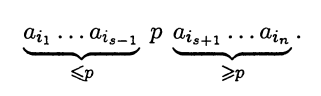
Итак, если индекс `s == k`, то опорный элемент `pivot` является той самой k-ой порядковой статистикой. Иначе, если `s > k`, то стоит проделать те же действия с элементами первого подмножества (уменьшили задачу на (n-s) элементов). В ином случае (`s < k`) - проделать эти действия с элементами второго подмножества (уменьшили задачу на s элементов).


In [57]:
def partition(Array, left, right):
    # всегда в качестве опорного выбираем самый левый элемент
    pivot = Array[left] 
    i, j = left+1, right
    while i <= j:
        while Array[i] < pivot:
            i+=1
        while Array[j] > pivot:
            j-=1
        Array[i], Array[j] = Array[j], Array[i]
    # отмена последнего обмена
    Array[i], Array[j] = Array[j], Array[i] 
    Array[left], Array[j] = Array[j], Array[left]
    return j

def selection_problem(Array, k):
    n = len(Array)
    s = -1
    left, right = 0, n-1
    while s != k-1:
        if s > (k-1):
            right = s-1
            s = partition(Array, left, right)
        else:
            left = s+1
            s = partition(Array, left, right)
    return Array[s]

In [60]:
example = [4, 1, 10, 9, 7, 12, 8, 2, 15]
print(f'n = {len(example)}')
print('Медиана списка: ', selection_problem(example, 5))

n = 9
Медиана списка:  8


Такой алгоритм работает в среднем за линейное время, что лучше, чем сортировка (хотя сортировка более устойчива - она "всегда" O(log(n)), в то время, как указанный алгоритм в худшем случае Theta(n^2) )
## Интерполяционный поиск
Другой алгоритм с переменным уменьшением размера.
Есть отсортированный в порядке возрастания список из n чисел. Требуется найти индекс конкретного элемента `v`.  
Можно использовать проверенный бинарный поиск. Однако, когда сравниваемые файлы большого размера, то лучше использовать интерполяционный поиск, который требует меньше сравнений (в среднем случае; в худшем случае - линейное время, что сильно опускает этот алгоритм).

*Логика интерполяционного поиска:* мы знаем, что числа в списке не убывают. Алгоритм предполагает, что значения растут линейно (то есть если отложить индексы по оси X, а значения списка по оси Y, то получится примерно линейная зависимость.
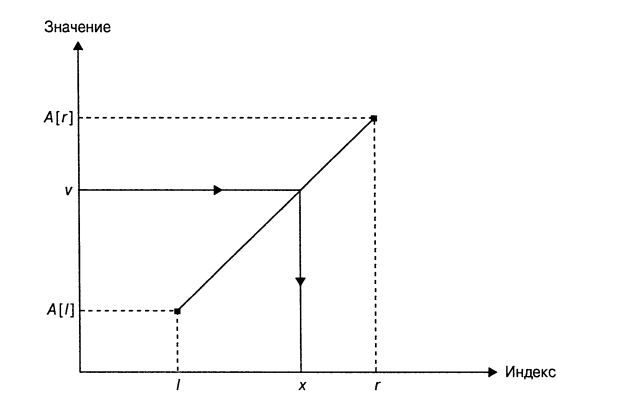
В соответствии с этим, при выполнении итерации между элементами `A[l] < v` и `A[r] > v` алгоритм предполагает, что индекс `x` элемента `v` лежит на прямой, потому его можно вычислить по формуле:
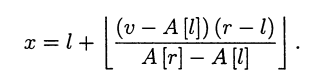
Если `A[x] == v`, то поиск закончен. В ином случае, при `A[x] > v` необходимо рассмотреть подмножество от `A[x+1]` до `A[r]`, иначе от `A[l]` до `A[x-1]`. Таким образом, размер задачи уменьшается на каждой итерации на некоторое неизвестное заранее число.

In [68]:
def interpolation_search(Array, value, left=0, right=None):
    if right is None:
        right = len(Array)-1
    x = left + int( (value - Array[left])*(right-left) / (Array[right] - Array[left]))
    if Array[x] == value:
        return x
    elif Array[x] < value:
        return interpolation_search(Array, value, left=x+1, right=right)
    else:
        return interpolation_search(Array, value, left=left, right=x-1)
    

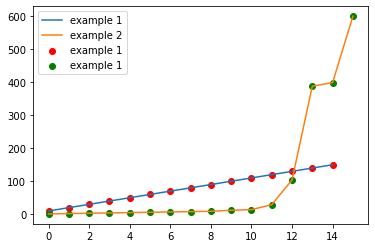

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

example1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
example2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14, 29, 104, 388, 399, 600]
plt.plot(list(range(len(example1))), example1, label='example 1')
plt.scatter(x=list(range(len(example1))), y=example1,c='r',label = 'example 1')
plt.scatter(x=list(range(len(example2))), y=example2,c='g',label = 'example 1')
plt.plot(list(range(len(example2))), example2, label='example 2')
plt.legend()

In [107]:
index1 = interpolation_search(example1, 110)
print('Индекс элемента 110: ', index1)
print('Проверка: ', example1[index1] == 110)

Индекс элемента 110:  10
Проверка:  True


In [108]:
index2 = interpolation_search(example2, 388)
print('Индекс элемента 388: ', index2)
print('Проверка: ', example2[index2] == 388)

Индекс элемента 388:  13
Проверка:  True
